# PCA и t-SNE, или зачем понижать размерность?

Это два метода для понижения размерности данных, но они предназначены для разных целей и работают по-разному.

# Что такое понижение размерности?

Когда у нас есть данные с большим числом признаков (например, сотни или тысячи), это может:

1. Усложнять вычисления и модели (проблема высокой размерности).
2. Приводить к избыточности данных (похожесть признаков).
3. Ухудшать интерпретацию (сложно визуализировать данные с более чем 3 измерениями).

Понижение размерности позволяет:

- Уменьшить количество признаков, сохраняя важную информацию.
- Облегчить визуализацию данных (в 2D или 3D).
- Ускорить работу моделей и снизить переобучение.

**Задача снижения размерности** — это задача преобразования данных с целью уменьшения количества признаков, которые описывают объект.

Методы снижения размерности могут преобразовывать данные двумя способами:

- линейно,
- нелинейно.

# PCA

Метод главных компонент, или PCA (Principal Components Analysis) — это один из базовых способов уменьшения размерности. Это линейный метод понижения размерности.

### Как работает PCA:
1. Поиск направлений максимальной дисперсии:

- PCA ищет новые оси (называемые главными компонентами), вдоль которых данные имеют максимальную изменчивость (дисперсию).
- Первые несколько компонент содержат основную часть информации.

2. Линейная проекция:

- Данные переносятся из исходного пространства в пространство с меньшим числом измерений, где оси ортогональны (независимы).

### Пример:
Если у вас есть 10 признаков, PCA может уменьшить их до 2 или 3, сохранив, например, 95% дисперсии данных.

### Преимущества PCA:
- Быстрота и простота.
- Удаляет корреляцию между признаками.
- Легко интерпретируем, так как использует линейные преобразования.

### Недостатки PCA:
- Работает только с линейными зависимостями.
- Может потерять информацию, если признаки нелинейно связаны.

Рассмотрим, как запустить PCA с помощью библиотеки sklearn:

In [19]:
# из модуля decomposition библиотеки sklearn импортируем класс PCA
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Генерируем синтетический набор данных
# 10 признаков, из которых 5 информативных и 5 шумовых
X, y = make_classification(
    n_samples=200, n_features=10, n_informative=5, n_redundant=0, random_state=42
)

# создаём объект класса PCA
# n_components — задаём количество компонентов для проведения трансформации
pca = PCA(n_components=2, random_state=42)

# обучаем модель на данных X
pca.fit(X)

# применяем уменьшение размерности к матрице X
pca.transform(X)

array([[ 1.28062737e+00,  1.61997514e+00],
       [ 1.01232054e+00,  1.53940136e+00],
       [ 2.77488964e+00, -1.97510515e-01],
       [-3.58052085e+00,  1.23442168e+00],
       [-2.85411313e+00,  5.37849451e-02],
       [-4.97755360e-01, -2.65821925e+00],
       [-1.07623888e-01, -5.21645081e-01],
       [ 2.06608035e+00,  9.07513510e-01],
       [-1.33938377e+00,  1.03075071e+00],
       [ 1.91042931e+00,  1.41918674e+00],
       [-3.11269855e+00,  1.04518723e+00],
       [-2.14087659e+00,  5.15985039e-01],
       [-1.00930970e+00,  7.60815923e-01],
       [-2.22289914e+00,  4.25337040e-01],
       [-4.68309077e+00,  4.93233230e-01],
       [ 1.76350992e-01,  8.85761763e-01],
       [ 3.53105577e+00,  7.42147255e-01],
       [-2.50412372e+00, -6.93223158e-02],
       [-7.92027742e-02, -1.03029023e+00],
       [ 1.02970084e+00, -1.00422505e+00],
       [-2.04589220e+00,  1.73872308e+00],
       [-1.03537315e+00, -1.72523066e+00],
       [ 9.31854263e-01,  7.69082473e-01],
       [ 1.

Также мы можем сразу обучить модель и применить трансформацию уменьшения размерности:

In [20]:
pca.fit_transform(X)

array([[ 1.28062737e+00,  1.61997514e+00],
       [ 1.01232054e+00,  1.53940136e+00],
       [ 2.77488964e+00, -1.97510515e-01],
       [-3.58052085e+00,  1.23442168e+00],
       [-2.85411313e+00,  5.37849451e-02],
       [-4.97755360e-01, -2.65821925e+00],
       [-1.07623888e-01, -5.21645081e-01],
       [ 2.06608035e+00,  9.07513510e-01],
       [-1.33938377e+00,  1.03075071e+00],
       [ 1.91042931e+00,  1.41918674e+00],
       [-3.11269855e+00,  1.04518723e+00],
       [-2.14087659e+00,  5.15985039e-01],
       [-1.00930970e+00,  7.60815923e-01],
       [-2.22289914e+00,  4.25337040e-01],
       [-4.68309077e+00,  4.93233230e-01],
       [ 1.76350992e-01,  8.85761763e-01],
       [ 3.53105577e+00,  7.42147255e-01],
       [-2.50412372e+00, -6.93223158e-02],
       [-7.92027742e-02, -1.03029023e+00],
       [ 1.02970084e+00, -1.00422505e+00],
       [-2.04589220e+00,  1.73872308e+00],
       [-1.03537315e+00, -1.72523066e+00],
       [ 9.31854263e-01,  7.69082473e-01],
       [ 1.

Теперь рассмотрим работу с PCA на практике. Из датасетов sklearn импортируем датасет MNIST — это данные, основанные на рукописном начертании цифр:

Для данного датасета обучим модель, которая по пикселям изображения предсказывает, что за цифра на нём изображена. Первой мы разработаем модель, которая будет учитывать все признаки, а затем уменьшим размерность данных с помощью PCA и ещё раз обучим модель. Далее мы сравним качество полученных моделей и время, которое было затрачено на обучение в каждом случае.

В датасете MNIST представлено 70 000 изображений, каждое из которых описывается 784 признаками.

In [21]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler
# импортируем класс PCA
from sklearn.decomposition import PCA

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

Посмотрим, сколько признаков описывало объект до и после уменьшения размерности. Как мы можем заметить, сначала было 787 признаков, а в конце объект описывают уже 300 главных компонент:

In [22]:
print(f'До понижения размерности: {len(train_x[0])}')
print(f'После понижения размерности: {len(train_x_pca[0])}')

До понижения размерности: 784
После понижения размерности: 300


Обучим модель логистической регрессии, которая на вход будет принимать пиксели изображения и предсказывать, что на нём нарисовано.

Напишем функцию, которая будет принимать на вход данные для обучения (матрицу с признаками и правильные ответы) и данные для тестирования модели, а на выходе будет возвращать время, затраченное на обучение модели, и качество модели. В качестве метрики оценивания качества будем использовать метрику accuracy.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from time import time

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    delta_time = (end_time - start_time)
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return delta_time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
display(f"Модель после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc:2f}")

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
display(f"Модель на исходных признаках. Время обучения {model_time}, метрика модели {model_acc:2f}")

'Модель после уменьшения размерности. Время обучения 15.772549867630005, метрика модели 0.925857'

'Модель на исходных признаках. Время обучения 25.36202120780945, метрика модели 0.918714'

Как видим, в данном случае мы потратили на обучение модели в два раза меньше времени, а качество осталось практически таким же!

В реальной работе бывает гораздо больше данных и на обучение модели уходит отнюдь не две минуты. Таким образом, применив технику уменьшения размерности, можно существенно сэкономить время.

# t-SNE

Для того чтобы визуализировать многомерное пространство признаков, необходимо уменьшить его размерность до двухмерного или трёхмерного. В этом поможет t-SNE (t-distributed Stochastic Neighbor Embedding), что переводится с английского как «стохастическое вложение соседей с t-распределением».

---

t-SNE, в отличие от PCA, использует технику нелинейного снижения размерности данных. Обычно используется снижение размерности многомерного пространства до двух- или трёхмерного с целью дальнейшей визуализации. При преобразовании похожие объекты оказываются рядом, а непохожие — далеко друг от друга.

### Как работает t-SNE:

1. Сохраняет локальную структуру данных:
- t-SNE преобразует данные так, чтобы близкие точки в исходном пространстве оставались близкими и в пониженном пространстве.

2. Стохастический процесс:
- Высокомерное пространство преобразуется в низкоразмерное (обычно 2D или 3D) через вероятностные распределения.

3. Фокус на визуализации:
- Метод упрощает восприятие кластеров и локальных структур в данных.

### Пример:
Используется для визуализации результатов кластеризации, таких как группировка пользователей или анализ изображений.

### Преимущества t-SNE:
- Отлично выявляет кластеры.
- Улавливает сложные нелинейные зависимости.

### Недостатки t-SNE:
- Высокая вычислительная сложность (медленный алгоритм).
- Не масштабируется на большие данные.
- Не подходит для анализа значений признаков (только для визуализации).

# Как запустить t-SNE?

In [25]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE

# Генерируем синтетический набор данных
# 10 признаков, из которых 5 информативных и 5 шумовых
X, y = make_classification(
    n_samples=200, n_features=10, n_informative=5, n_redundant=0, random_state=42
)

# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и производим трансформацию
tsne.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


array([[ 7.93337011e+00, -1.15998840e+00],
       [ 9.06530666e+00, -5.18404055e+00],
       [ 1.17543087e+01,  1.29848504e+00],
       [-1.19946890e+01,  1.25397468e+00],
       [-1.03572931e+01, -3.18003535e+00],
       [-4.67155313e+00,  7.56201935e+00],
       [-2.11273932e+00,  1.36149228e+00],
       [ 1.15397472e+01, -7.76600301e-01],
       [-7.43102729e-01,  4.91200113e+00],
       [ 5.11895275e+00, -4.49331105e-01],
       [-1.18080883e+01, -4.80437136e+00],
       [-7.03683901e+00, -2.85326028e+00],
       [-8.49736881e+00, -3.78741193e+00],
       [-9.60138988e+00, -4.34728718e+00],
       [-1.22246428e+01, -2.76898384e+00],
       [ 9.75543022e+00,  4.45928717e+00],
       [ 1.43767710e+01, -2.17614317e+00],
       [-1.34144344e+01,  5.12403488e-01],
       [-2.01025176e+00,  3.64174128e+00],
       [-7.15909377e-02, -3.77228951e+00],
       [-1.15446682e+01, -8.98024321e-01],
       [-6.73440409e+00,  3.75885868e+00],
       [ 1.71481216e+00,  1.55053926e+00],
       [ 2.

### Важные параметры для запуска:

- n_components — размерность нового пространства.
- perplexity — один из важнейших параметров для запуска. Этот параметр описывает ожидаемую плотность вокруг точки. Таким образом мы можем устанавливать соотношение ближайших соседей к точке. Если датасет большой, стоит установить большее значение perplexity. Обычно используют значения в диапазоне от 5 до 50.
- n_iter — количество итераций для оптимизации.
- random_state — так как в алгоритме есть случайность, задание random_state позволяет от запуска к запуску получать одинаковые результаты.

Теперь попробуем уменьшить размерность и визуализировать пространство пикселей, которые описывают данные рукописного начертания цифр. Сравним, какая визуализация получается при использовании PCA и tSNE.

### Уменьшим размерность с помощью PCA:

<Axes: xlabel='0', ylabel='1'>

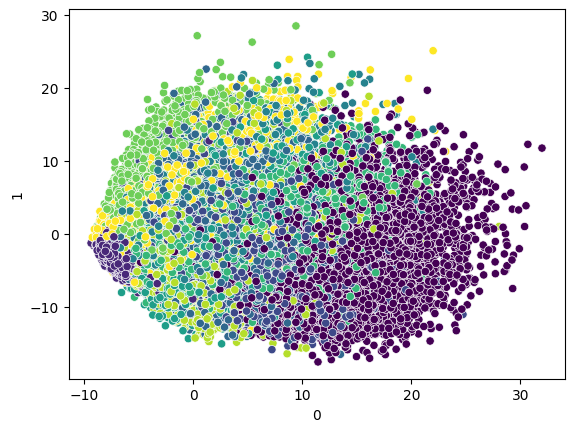

In [26]:
import seaborn as sns
import pandas as pd

# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)

# уменьшим размерность данных
X_reduced = pca.fit_transform(train_x)

# сохраним данные в датафрейм
df_pca = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

### Уменьшим размерность с помощью t-SNE:

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

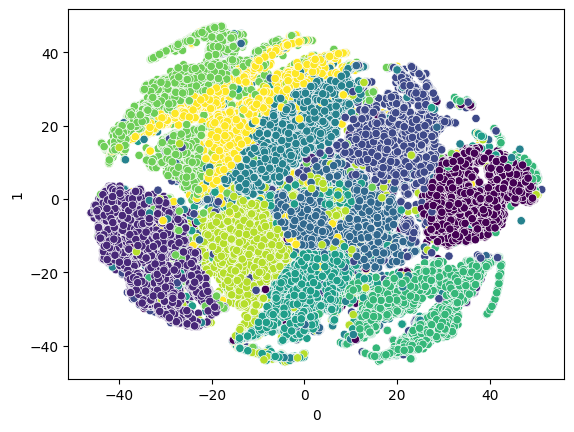

In [28]:
# создадим объект класса TSNE, уменьшим размерность данных до 2
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
# уменьшим размерность данных

# уменьшим размерность данных
X_reduced = tsne.fit_transform(train_x)

# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()# визуализируем
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])

Как видим, алгоритм t-SNE отлично справляется с уменьшением размерности для визуализации, а вот при использовании PCA данные не разделились на кластеры и пересекаются друг с другом — такую визуализацию будет неудобно анализировать.

| **Метод**               | **PCA**                                                                 | **T-SNE**                                                                 |
|--------------------------|------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Преобразование, которое используется для снижения размерности** | Линейное                                                              | Нелинейное                                                               |
| **Кейсы использования** | Уменьшение размерности данных с целью их дальнейшего использования в ML-моделях | Визуализация многомерного пространства                                    |
| **Вызов в sklearn**      | `from sklearn.decomposition import PCA`                               | `from sklearn.manifold import TSNE`                                      |